#### Target guided ordinal encoding

There are however methods that allow us to capture information while pre-processing the labels of categorical variables. These methods include:

1)Ordering the labels according to the target

2)Replacing labels by the risk (of the target)

3)Replacing the labels by the joint probability of the target being 1 or 0

4) Weight of evidence.

#### Monotonicity



All these methods create a monotonic relationship between the categorical variable and the target. A monotonic relationship is a relationship that does one of the following: (1) as the value of one variable increases, so does the value of the other variable; or (2) as the value of one variable increases, the other variable value decreases. In this case, as the value of the independent variable (predictor) increases, so does the target, or conversely, as the value of the variable increases, the target decreases.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
# let's load again the titanic dataset

data = pd.read_csv('/Users/nandrajog/Downloads/titanic.csv', usecols=['Cabin', 'Survived'])
data.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


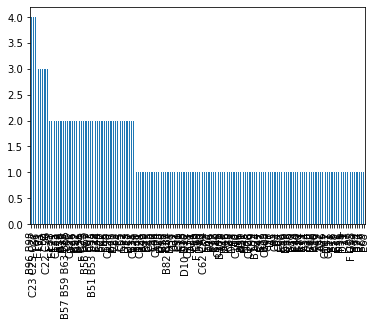

In [3]:
data.Cabin.value_counts().plot.bar()

In [4]:
len(data.Cabin.unique())

148

In [5]:
data.Cabin.isna().value_counts()

True     687
False    204
Name: Cabin, dtype: int64

In [6]:
data.Cabin.fillna('Missing',inplace=True)

In [8]:
data.Cabin.isna().value_counts()

False    891
Name: Cabin, dtype: int64

In [11]:
data.head(10)

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing
5,0,Missing
6,0,E46
7,0,Missing
8,1,Missing
9,1,Missing


In [17]:
# Now we extract the first letter of the cabin

data['Cabin'] = data['Cabin'].astype(str).str[0]
data.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [18]:

X_train, X_test, y_train, y_test = train_test_split(
    data[['Cabin', 'Survived']], data.Survived, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((623, 2), (268, 2))

In [26]:
X_train.groupby(['Cabin'])['Survived'].mean().sort_values()

Cabin
T    0.000000
M    0.303609
A    0.428571
G    0.500000
C    0.571429
F    0.666667
D    0.692308
E    0.740741
B    0.774194
Name: Survived, dtype: float64

In [28]:
ordered_labels =X_train.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [48]:
ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
ordinal_label

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'D': 6, 'E': 7, 'B': 8}

In [49]:
ordinal_label

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'D': 6, 'E': 7, 'B': 8}

In [50]:
# for i in ordinal_label:
X_train['Cabin_ordered'] = X_train.Cabin.map(ordinal_label)
X_test['Cabin_ordered'] = X_test.Cabin.map(ordinal_label)

In [51]:
X_train

,Cabin,Survived,Cabin_ordered
857,E,1,7
52,D,1,6
386,M,0,1
124,D,0,6
578,M,0,1
...,...,...,...
835,E,1,7
192,M,1,1
629,M,0,1
559,M,1,1


Text(0, 0.5, 'Survived')

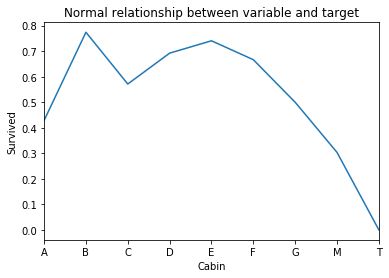

In [52]:
# let's inspect the newly created monotonic relationship with the target

#first we plot the original variable for comparison, there is no monotonic relationship

fig = plt.figure()
fig = X_train.groupby(['Cabin'])['Survived'].mean().plot()
fig.set_title('Normal relationship between variable and target')
fig.set_ylabel('Survived')

Text(0, 0.5, 'Survived')

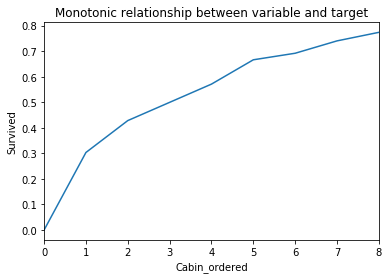

In [53]:

# plot the transformed result: the monotonic variable

fig = plt.figure()
fig = X_train.groupby(['Cabin_ordered'])['Survived'].mean().plot()
fig.set_title('Monotonic relationship between variable and target')
fig.set_ylabel('Survived')

There is now a monotonic relationship between the variable Cabin and probability of survival. The higher the Cabin number, the more likely the person was to survive.